(40, 10, 1)
(40, 10, 1)


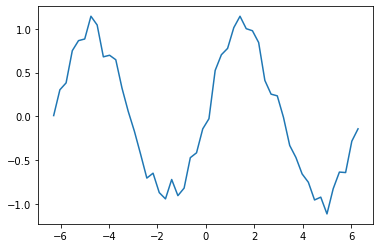

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))

plt.plot(x_data, sin_data)

# 時系列の数
n_rnn = 10
n_sample = len(x_data) - n_rnn
x = np.zeros((n_sample, n_rnn))  # 入力
t = np.zeros((n_sample, n_rnn))  # 正解
for i in range(0, n_sample):
    x[i] = sin_data[i: i+n_rnn]
    t[i] = sin_data[i+1: i+n_rnn+1]

# KerasにおけるRNNでは、入力を（サンプル数、時系列の数、入力層のニューロン数）にする
x = x.reshape(n_sample, n_rnn, 1)
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)
print(t.shape)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10, 20)            440       
_________________________________________________________________
dense_1 (Dense)              (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(x, t, epochs=20, batch_size=batch_size, validation_split=0.1)

Epoch 1/20


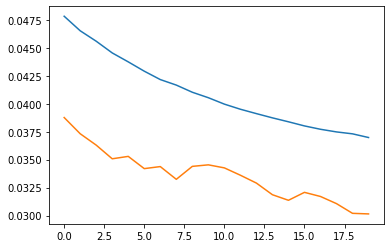

In [9]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

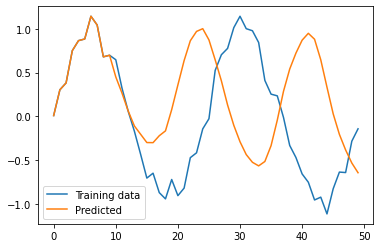

In [10]:
predicted = x[0].reshape(-1)

for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))  # 直近のデータを予測に用いる
    predicted = np.append(predicted, y[0][n_rnn-1][0])  # 出力の最後の結果をpredictnいついかする

plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")
plt.legend()
plt.show()